# Preamble

In [1]:
!pip install numpy scipy scikit-learn tensorflow keras matplotlib pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant
from tensorflow.keras.regularizers import l2

# Question 1: Building a classifier


You have used Pandas for a small part of your assignment 1. Now, we will see what we
can do with it. We will use the same dataset (IMDB movie review dataset) that you used
in Assignment 1.

a. Load the dataset using Pandas like you did previously.

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


b. Use a bag-of-words model (known as CountVectorizer in scikit-learn) to convert
the reviews into vectors

In [5]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['review'])

c. Split the data into two parts, training and testing. You will train a machine
learning model on the training part of the data, and then you will test its
performance on test part of the data. Use an 80-20 split for your data, that is,
80% of the data will be for training and 20% of the data will be for testing

In [7]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['sentiment'], test_size=0.2, random_state=42)

d. Now, train two machine learning models on the training part of your data. You will use a logistic regression model and a naive bayes model

In [9]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

e. Compare the accuracies of the models. Use visualization techniques that you
like (charts, bar graphs etc.). Which one is better? Explain your answer

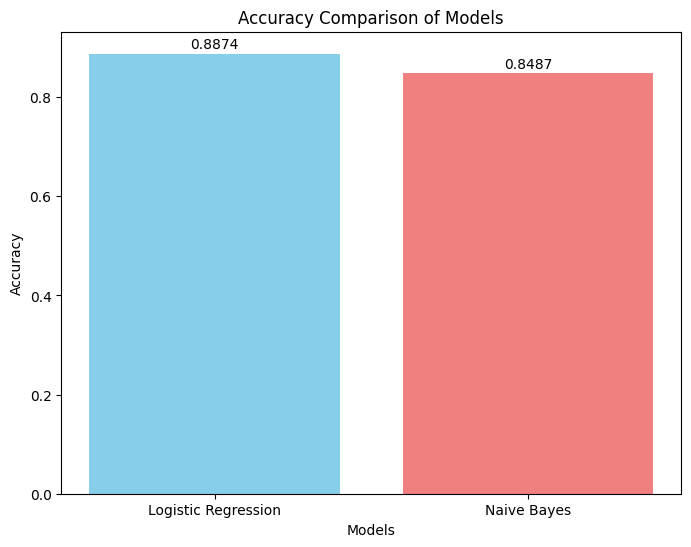


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [10]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_lr, accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()


# Classification Report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

Here Logistic Regression performs better than Naive Bayes because as a discriminative model logistic regression can make strong assumptions about the distribution of the features than a generative model like naive bayes. 

# Question 2: Building a classifier (contd.)

Perform the same tasks mentioned in question 1, but now, instead of a bag-of-word
vectorizer, you will use a TF-IDF vectorizer. If you have done the bonus part of the
previous assignment, you already know how to do it.

In [11]:
# Convert reviews to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(stop_words='english', encoding='utf-8')
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

Run logistic regression and naive
bayes models on this as well, and show which one is better between a bag-of-words
and a TF-IDF model. Explain your answer.

In [12]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

In [13]:
# Logistic Regression
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = log_reg.predict(X_test_tfidf)
accuracy_lr_tfidf = accuracy_score(y_test, y_pred_lr_tfidf)

#Naive Bayes
nb.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb.predict(X_test_tfidf)
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)

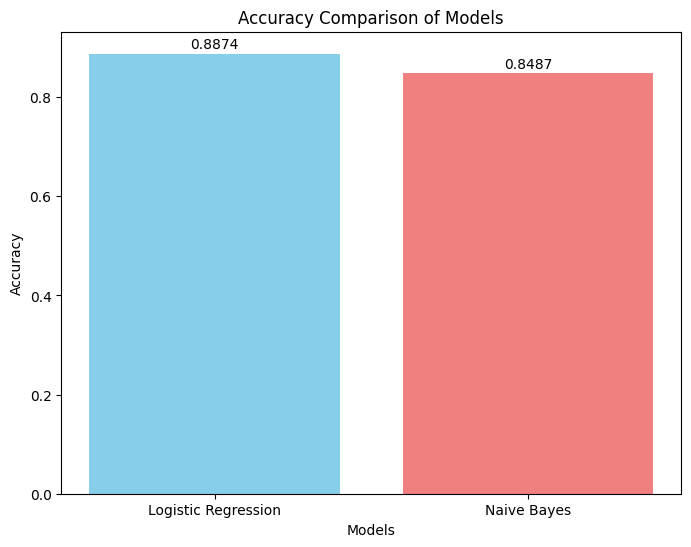


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [14]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [accuracy_lr, accuracy_nb]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.title('Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')  # Added formatting for 4 decimal places

plt.show()


# Classification Report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

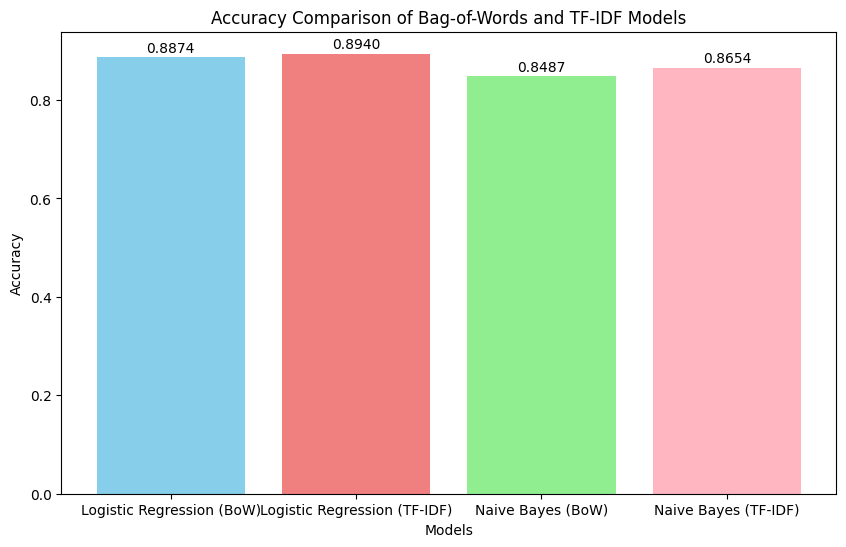

In [15]:
models_bow_tfidf = ['Logistic Regression (BoW)', 'Logistic Regression (TF-IDF)', 'Naive Bayes (BoW)', 'Naive Bayes (TF-IDF)']
accuracies_bow_tfidf = [accuracy_lr, accuracy_lr_tfidf, accuracy_nb, accuracy_nb_tfidf]

plt.figure(figsize=(10, 6))
plt.bar(models_bow_tfidf, accuracies_bow_tfidf, color=['skyblue', 'lightcoral', 'lightgreen', 'lightpink'])
plt.title('Accuracy Comparison of Bag-of-Words and TF-IDF Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')

for i, v in enumerate(accuracies_bow_tfidf):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()

Classifiers with TF-IDF outperforms the Bag of Words model. Because TF-IDF assign weights to terms based on importance, balancing term frequency within a document and inverse document frequency across the corpus which reduces the impact of common, less informative words and highlights unique, informative terms, thereby reducing noise and improving the relevance of features. Consequently, TF-IDF enhances the discriminative power of classifiers by focusing on more meaningful words, leading to better performance in text classification tasks.

# Question 3: Training a deep learning model

From the previous two questions, you learnt how to build a classical machine learning
model. Now, we will build a shallow (single hidden layer) recurrent neural network
model to do the same thing. Use the tutorial given in the preamble. Your model will
have three layers: one Embedding Layer with output shape 100 which will convert your
words to a 100-length vector, one dense layer with an output shape 10, and the final
output layer (another dense layer) with output shape 1. Do not use any pooling or any
other layer.

Sequential neural nets use word vectors, not sentence vectors that were used in
previous two questions. So, you will need to learn how to use word embeddings. In
the “Using Pretrained Word Embeddings” section of the tutorial, you will learn how to
load pretrained GloVe embeddings into an embedding layer. This embedding layer is
your input layer, which will feed into your hidden dense layer, and the output of your
dense layer will give you a probability whether the review is positive or negative.

Build your model the way you see in the tutorial. Run it for 50 epochs (it may run for a long time depending on your computer). You can play with the hyperparameters like
changing the batch size etc. See how well this model performs compared to the other
models.

In [16]:
# Tokenization and padding (same as before)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])
X_seq = tokenizer.texts_to_sequences(df['review'])
X_padded = pad_sequences(X_seq, maxlen=100)

In [17]:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded, df['sentiment'], test_size=0.2, random_state=42)

In [18]:
glove_file = 'glove.6B.100d.txt'
embedding_dim = 100

embedding_index = {}
with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

word_index = tokenizer.word_index
num_words = min(5000, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [19]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=100, trainable=False),
    Flatten(),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
history = model.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4981 - loss: 0.8433 - val_accuracy: 0.5000 - val_loss: 0.7113
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5011 - loss: 0.7067 - val_accuracy: 0.5000 - val_loss: 0.6987
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5154 - loss: 0.6987 - val_accuracy: 0.5211 - val_loss: 0.6968
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5871 - loss: 0.6873 - val_accuracy: 0.7094 - val_loss: 0.6454
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7073 - loss: 0.6400 - val_accuracy: 0.7341 - val_loss: 0.6167
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7458 - loss: 0.6035 - val_accuracy: 0.7394 - val_loss: 0.6073
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7531 - loss: 0.5870 - val_accuracy: 0.7384 - val_loss: 0.6063
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7629 - loss: 0.5768 - val_accuracy: 0.

In [21]:
loss, accuracy = model.evaluate(X_test_rnn, y_test_rnn)
print(f"RNN Model Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.7371 - loss: 0.6136
RNN Model Accuracy: 0.7350000143051147


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 100, 100)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 10000)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 10)               │       100,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 1)                │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 800,065 (3.05 MB)

 Trainable params: 100,021 (390.71 KB)

 Non-trainable params: 500,000 (1.91 MB)

 Optimizer params: 200,044 (781.43 KB)

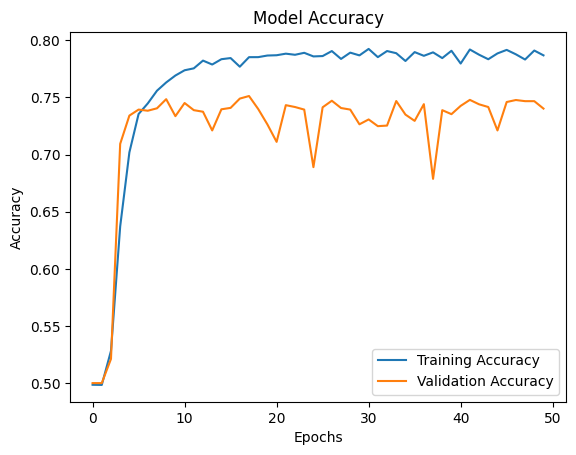

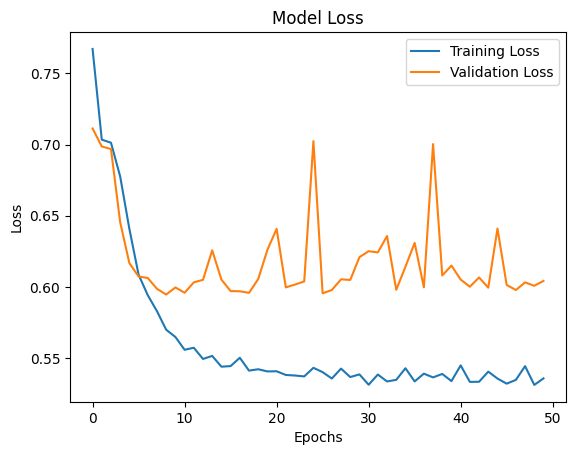

In [23]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Another try with a LSTM layer

In [24]:
model2 = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=100, trainable=False),
    LSTM(64, kernel_regularizer=l2(0.01)),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01))
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history2 = model2.fit(X_train_rnn, y_train_rnn, epochs=50, batch_size=64, validation_split=0.2, verbose=1)
loss, accuracy = model2.evaluate(X_test_rnn, y_test_rnn)
print(f"RNN Model Accuracy: {accuracy}")

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5848 - loss: 1.1697 - val_accuracy: 0.7498 - val_loss: 0.6059
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7153 - loss: 0.6338 - val_accuracy: 0.7744 - val_loss: 0.5383
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7741 - loss: 0.5412 - val_accuracy: 0.8001 - val_loss: 0.5006
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7874 - loss: 0.5215 - val_accuracy: 0.8067 - val_loss: 0.4821
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7988 - loss: 0.4990 - val_accuracy: 0.7986 - val_loss: 0.5007
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8056 - loss: 0.4880 - val_accuracy: 0.8006 - val_loss: 0.5073
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8148 - loss: 0.4712 - val_accuracy: 0.8146 - val_loss: 0.4597
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8141 - loss: 0.4657 - 

In [26]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (64, 100, 100)         │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (64, 64)               │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (64, 10)               │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (64, 1)                │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,705 (2.40 MB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 500,000 (1.91 MB)

 Optimizer params: 85,804 (335.18 KB)

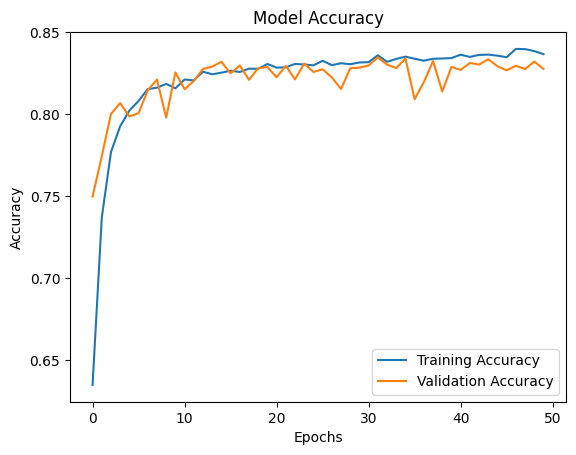

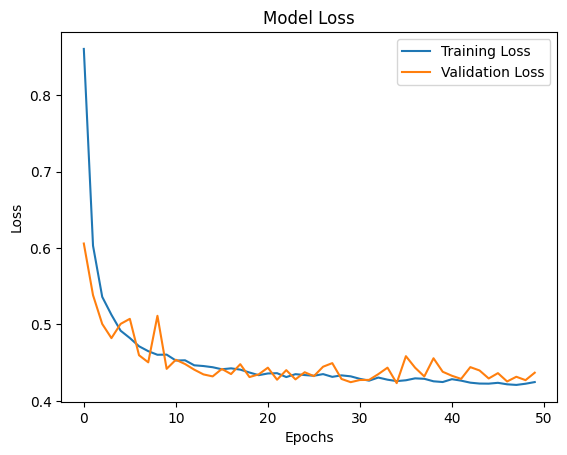

In [27]:
# Plot accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()